In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df_factorized = pd.read_csv('clas6/CLAS6_factorized.txt')
df_factorized.head()


,rc_type,xs_type,rs,x,z,Q,qT_Q,xs,xs_err
0,rc,unpol,3.25,0.3025,0.2,1.54,1.510700,0.000954,3.238968e-08
1,rc,unpol,3.25,0.3025,0.2,1.54,1.007133,0.002129,9.053538e-08
2,rc,unpol,3.25,0.3025,0.2,1.54,0.755350,0.002821,8.728114e-08
3,rc,unpol,3.25,0.3025,0.2,1.54,0.604280,0.003213,7.246642e-08
4,rc,unpol,3.25,0.3025,0.2,1.54,0.503567,0.003450,6.090756e-08


0.2 1.5107 born 36    0.000994
Name: xs, dtype: float64 rc 0    0.000954
Name: xs, dtype: float64
0.3 1.007133 born 43    0.000567
Name: xs, dtype: float64 rc 7    0.000533
Name: xs, dtype: float64
0.4 0.75535 born 50    0.000328
Name: xs, dtype: float64 rc 14    0.000304
Name: xs, dtype: float64
0.5 0.60428 born 57    0.000193
Name: xs, dtype: float64 rc 21    0.000176
Name: xs, dtype: float64
0.6 0.503567 born 64    0.000115
Name: xs, dtype: float64 rc 28    0.000103
Name: xs, dtype: float64
0.7 0.431629 born 71    0.000067
Name: xs, dtype: float64 rc 35    0.000058
Name: xs, dtype: float64


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/1174823652.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs_born_factorized =  df_factorized[df_factorized['rc_type']=='born'][df_factorized['Q']==1.540000][df_factorized['z']==i_z][df_factorized['x']==0.302500][df_factorized['qT_Q']==qT_Q]['xs']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/1174823652.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs_rc_factorized =  df_factorized[df_factorized['rc_type']=='rc'][df_factorized['Q']==1.540000][df_factorized['z']==i_z][df_factorized['x']==0.302500][df_factorized['qT_Q']==qT_Q]['xs']


Text(0.5, 0, 'z')

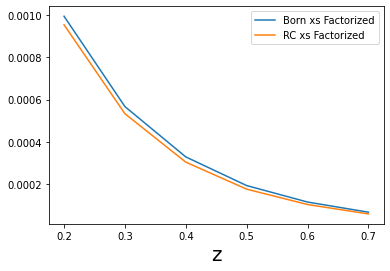

In [3]:

zs_factorized = df_factorized[df_factorized['Q']==1.540000][df_factorized['x']==0.302500]['z'].unique()
xs_born_factorizeds =[]
xs_rc_factorizeds=[]
for i_z in zs_factorized:
    qT_Q = round(0.30214/i_z,6)
    
    xs_born_factorized =  df_factorized[df_factorized['rc_type']=='born'][df_factorized['Q']==1.540000][df_factorized['z']==i_z][df_factorized['x']==0.302500][df_factorized['qT_Q']==qT_Q]['xs']
    xs_rc_factorized =  df_factorized[df_factorized['rc_type']=='rc'][df_factorized['Q']==1.540000][df_factorized['z']==i_z][df_factorized['x']==0.302500][df_factorized['qT_Q']==qT_Q]['xs']
    print(i_z,qT_Q,'born',xs_born_factorized,'rc',xs_rc_factorized)
    xs_born_factorizeds.append(xs_born_factorized)
    xs_rc_factorizeds.append(xs_rc_factorized)
plt.plot(zs_factorized,xs_born_factorizeds,'-',label='Born xs Factorized')
plt.plot(zs_factorized,xs_rc_factorizeds,'-',label='RC xs Factorized')
plt.legend()
plt.xlabel('z',fontsize=20)

In [4]:


df_traditional = pd.read_csv('clas6/out_clas6_born.txt',delim_whitespace=True,skiprows=[0])
df_traditional.head()



,z,yield
0,0.005,0.0
1,0.015,0.0
2,0.025,0.0
3,0.035,0.0
4,0.045,0.0


In [5]:
df_traditional_rc = pd.read_csv('clas6/out_clas6_rc.txt',delim_whitespace=True,skiprows=[0])
df_traditional_rc.head()

,z,yield
0,0.005,0.0
1,0.015,0.0
2,0.025,0.0
3,0.035,0.0
4,0.045,0.0


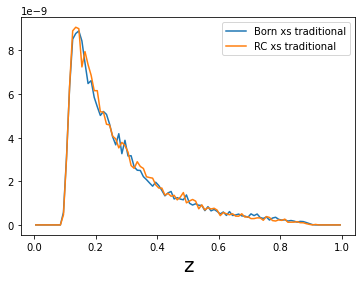

In [6]:
#Factor = 1e6*13448

#1000/(2.56819*(2.66-2.23)*(0.32-0.28)*(0.2809-0.1681)*(0.4-0.36)*(-2.44+3.141592))
#Q2,x,pt2,z,phi
#Factor_born_z = 1000/(2.56819*(2.66-2.23)*(0.32-0.28)*(0.2809-0.1681)*(-2.44+3.141592)*(0.4-0.36)*2)
Factor_born_z = 1000/(2.56819*(2.66-2.23)*(0.3379-0.3025)*(0.2809-0.1681)*(-2.44+3.141592)*(0.4134-0.3748)*2)
Factor_rc_z = Factor_born_z
#Factor = 5.1782e10/(2099*2*3.14)
#Factor = 1/5.1782e10
zs_traditional = df_traditional['z']
xs_born_traditional =  df_traditional['yield']

zs_rc_traditional = df_traditional_rc['z']
xs_rc_traditional =  df_traditional_rc['yield']

plt.plot(zs_traditional,np.asarray(xs_born_traditional),'-',label='Born xs traditional')
plt.plot(zs_rc_traditional,np.asarray(xs_rc_traditional),'-',label='RC xs traditional')
#plt.plot(zs_traditional,np.asarray(xs_born_traditional)*Factor_born_z,'-',label='Born xs traditional')
#plt.plot(zs_rc_traditional,np.asarray(xs_rc_traditional)*Factor_rc_z,'-',label='RC xs traditional')


plt.legend()
plt.xlabel('z',fontsize=20)
#print(df_traditional_rc['yield'].sum()*Factor_rc_z)

#plt.plot(zs_factorized,xs_born_factorized,'-',label='Born xs Factorized')
#plt.plot(zs_factorized,xs_rc_factorized,'-',label='RC xs Factorized')

plt.savefig('clas6/traditional_z.pdf')



/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/1606507228.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(zs_traditional,np.asarray(xs_born_traditional)*Factor_born_z/(np.asarray(xs_rc_traditional)*Factor_rc_z),'bo',label='Born/RC')
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/1606507228.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(zs_traditional,np.asarray(xs_born_traditional)*Factor_born_z/(np.asarray(xs_rc_traditional)*Factor_rc_z),'bo',label='Born/RC')


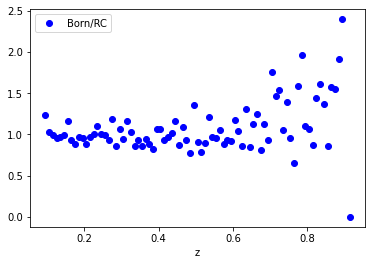

In [7]:
plt.plot(zs_traditional,np.asarray(xs_born_traditional)*Factor_born_z/(np.asarray(xs_rc_traditional)*Factor_rc_z),'bo',label='Born/RC')
plt.xlabel('z')
plt.legend()


Text(0.5, 0, 'z')

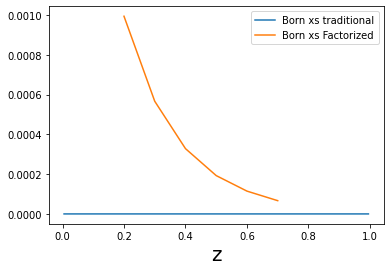

In [8]:
plt.plot(zs_traditional,np.asarray(xs_born_traditional),'-',label='Born xs traditional')
plt.plot(zs_factorized,np.asarray(xs_born_factorizeds),'-',label='Born xs Factorized')

#plt.xlim(0.3,0.7)
#plt.ylim(0,0.001)
plt.legend()
plt.xlabel('z',fontsize=20)

In [9]:
clas6_data = pd.read_csv('clas6/CLAS6.txt', delim_whitespace=True)
clas6_data['x'].unique()

array([0.1468, 0.1753, 0.2051, 0.2362, 0.2686, 0.3025, 0.3379, 0.3748,
       0.4134, 0.4537, 0.4958, 0.5397, 0.5855, 0.6334, 0.6834, 0.7355,
       0.79  , 0.8469, 0.9063])

In [10]:
#For Q2=2.4,x=0.3,z =0.37,pt2=0.22, this part is for z from 0.1 to 1
#The accurate value is Q2=2.37, x = 0.3025
df1=clas6_data[clas6_data['Q2']==2.37][clas6_data['x']==0.3025][clas6_data['pT2']==0.2165][clas6_data['phi']==10]
df1

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/1130635058.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=clas6_data[clas6_data['Q2']==2.37][clas6_data['x']==0.3025][clas6_data['pT2']==0.2165][clas6_data['phi']==10]


,Q2,x,z,pT2,phi,ds_dxdQ2dzdpT2dphi,stat_err,sys_err,rad_cor
42366,2.37,0.3025,0.1194,0.2165,10.0,0.013950,0.000587,0.002209,0.9696
42448,2.37,0.3025,0.1468,0.2165,10.0,0.013852,0.000456,0.001682,0.9822
42544,2.37,0.3025,0.1753,0.2165,10.0,0.015382,0.000518,0.001901,0.9746
42642,2.37,0.3025,0.2051,0.2165,10.0,0.014343,0.000464,0.001789,0.9684
42762,2.37,0.3025,0.2362,0.2165,10.0,0.013612,0.000488,0.001663,0.9635
42882,2.37,0.3025,0.2686,0.2165,10.0,0.011397,0.000536,0.001370,0.9592
43000,2.37,0.3025,0.3025,0.2165,10.0,0.011075,0.000758,0.001323,0.9553
43132,2.37,0.3025,0.3379,0.2165,10.0,0.009323,0.001128,0.001109,0.9514
43262,2.37,0.3025,0.3748,0.2165,10.0,0.008034,0.002235,0.000957,0.9483


[0.1194, 0.1468, 0.1753, 0.2051, 0.2362, 0.2686, 0.3025, 0.3379, 0.3748]
[0.01395, 0.013852, 0.015382, 0.014343, 0.013612, 0.011397, 0.011075, 0.0093227, 0.0080338]
[0.002209  0.0016817 0.0019009 0.0017891 0.0016633 0.0013701 0.0013228
 0.001109  0.0009572]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/3396413557.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(zs_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')


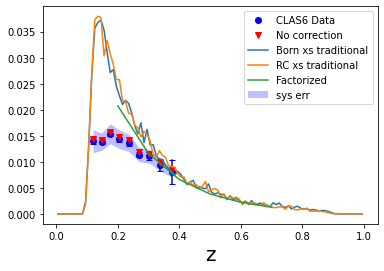

In [11]:

zs = df1['z'].unique()
#print(zs)
zs_axis=[]
xs_axis=[]
xs_before_axis=[]
xs_stat_err_axis=[]
xs_sys_err_axis=[]
fig = plt.figure()
ax = fig.add_subplot()
for i_z in zs:
    #print(i_z)
    #print(df1[df1['z']==i_z])#['ds_dxdQ2dzdpT2dphi'])
    xs = np.mean(df1[df1['z']==i_z]['ds_dxdQ2dzdpT2dphi'])
    rc = np.mean(df1[df1['z']==i_z]['rad_cor'])
    #print(xs,rc)
    xs_before=(xs/rc)
    #print(xs_before)
    xs_stat_err = np.mean(df1[df1['z']==i_z]['stat_err'])
    xs_sys_err = np.mean(df1[df1['z']==i_z]['sys_err'])
    zs_axis.append(i_z)
    xs_axis.append(xs)
    xs_before_axis.append(xs_before)
    xs_stat_err_axis.append(xs_stat_err)
    xs_sys_err_axis.append(xs_sys_err)
    ax.plot([i_z,i_z],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')
print(zs_axis)
print(xs_axis)
print(np.asarray(xs_sys_err_axis))
ax.fill_between(zs_axis,np.asarray(xs_axis)-np.asarray(xs_sys_err_axis),np.asarray(xs_axis)+np.asarray(xs_sys_err_axis),color='blue',alpha=0.25,linewidth=0,label='sys err')
plt.plot(zs_axis,xs_axis,'o',color='blue',label='CLAS6 Data')
plt.plot(zs_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')
plt.xlabel('z',fontsize=20)


plt.plot(zs_traditional,np.asarray(xs_born_traditional)*Factor_born_z,'-',label='Born xs traditional')
plt.plot(zs_rc_traditional,np.asarray(xs_rc_traditional)*Factor_rc_z,'-',label='RC xs traditional')
plt.plot(zs_factorized,((1000*(-2.44+3.141592))/(2.56819*2*(2*math.pi)))*np.asarray(xs_rc_factorizeds),'-',label='Factorized')
#plt.xlim(0.3,0.7)
#plt.ylim(0,0.02)
plt.legend()

plt.savefig('clas6/compare_z.pdf')

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/4191473674.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(zs_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')


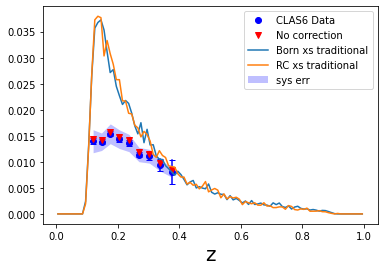

In [12]:

zs = df1['z'].unique()
zs_axis=[]
xs_axis=[]
xs_before_axis=[]
xs_stat_err_axis=[]
xs_sys_err_axis=[]
fig = plt.figure()
ax = fig.add_subplot()
for i_z in zs:
    #print(i_z)
    #print(df1[df1['z']==i_z])#['ds_dxdQ2dzdpT2dphi'])
    xs = np.mean(df1[df1['z']==i_z]['ds_dxdQ2dzdpT2dphi'])
    rc = np.mean(df1[df1['z']==i_z]['rad_cor'])
    xs_before=(xs/rc)
    #print(xs)
    xs_stat_err = np.mean(df1[df1['z']==i_z]['stat_err'])
    xs_sys_err = np.mean(df1[df1['z']==i_z]['sys_err'])
    zs_axis.append(i_z)
    xs_axis.append(xs)
    xs_before_axis.append(xs_before)
    xs_stat_err_axis.append(xs_stat_err)
    xs_sys_err_axis.append(xs_sys_err)
    ax.plot([i_z,i_z],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')

ax.fill_between(zs_axis,np.asarray(xs_axis)-np.asarray(xs_sys_err_axis),np.asarray(xs_axis)+np.asarray(xs_sys_err_axis),color='blue',alpha=0.25,linewidth=0,label='sys err')
plt.plot(zs_axis,xs_axis,'o',color='blue',label='CLAS6 Data')
plt.plot(zs_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')
plt.xlabel('z',fontsize=20)


plt.plot(zs_traditional,np.asarray(xs_born_traditional)*Factor_born_z,'-',label='Born xs traditional')
plt.plot(zs_rc_traditional,np.asarray(xs_rc_traditional)*Factor_rc_z,'-',label='RC xs traditional')
#plt.plot(zs_factorized,2*xs_rc_factorized,'-',label='2*Factorized')
#plt.xlim(0.3,0.7)
#plt.ylim(0,0.02)
plt.legend()

plt.savefig('clas6/compare_z_20.pdf')

2.7763018e-09


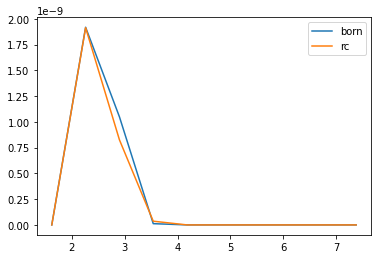

In [13]:

Factor_born_Q2 =1000/(2.56819*(0.32-0.28)*(0.2809-0.1681)*(0.4-0.36)*(-2.44+3.141592))
Factor_rc_Q2 = Factor_born_Q2
df_born_Q2_traditional=pd.read_csv('clas6/out_clas6_born_Q2.txt',delim_whitespace=True,skiprows=[0])
df_born_Q2_traditional.head()
df_rc_Q2_traditional=pd.read_csv('clas6/out_clas6_rc_Q2.txt',delim_whitespace=True,skiprows=[0])
df_rc_Q2_traditional.head()

Q2s_born_traditional = df_born_Q2_traditional['Q2']
xss_Q2_born_traditional = df_born_Q2_traditional['yield']
Q2s_rc_traditional = df_rc_Q2_traditional['Q2']
xss_Q2_rc_traditional = df_rc_Q2_traditional['yield']

plt.plot(Q2s_born_traditional,xss_Q2_born_traditional,label = 'born')
plt.plot(Q2s_rc_traditional,xss_Q2_rc_traditional,label = 'rc')
plt.legend()
print(df_rc_Q2_traditional['yield'].sum())

In [14]:
#For Q2=2.4,x=0.3,z =0.37,pt2=0.22, this part is for Q2 from 1.6 to 3.2
#The accurate value is Q2=2.37, x = 0.3025,z = 0.3748
df_Q2=clas6_data[clas6_data['z']==0.3748][clas6_data['x']==0.3025][clas6_data['pT2']==0.2165][clas6_data['phi']==10]
df_Q2


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/3283783684.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Q2=clas6_data[clas6_data['z']==0.3748][clas6_data['x']==0.3025][clas6_data['pT2']==0.2165][clas6_data['phi']==10]


,Q2,x,z,pT2,phi,ds_dxdQ2dzdpT2dphi,stat_err,sys_err,rad_cor
12803,1.74,0.3025,0.3748,0.2165,10.0,0.015876,0.008506,0.002292,0.9227
26990,2.02,0.3025,0.3748,0.2165,10.0,0.008056,0.003790,0.001017,0.9335
43262,2.37,0.3025,0.3748,0.2165,10.0,0.008034,0.002235,0.000957,0.9483
57639,2.93,0.3025,0.3748,0.2165,10.0,0.005654,0.001360,0.000677,0.9770


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/2526305188.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(Q2s_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')


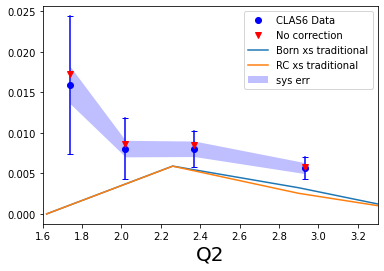

In [15]:

Q2s = df_Q2['Q2'].unique()
Q2s_axis=[]
xs_axis=[]
xs_before_axis=[]
xs_stat_err_axis=[]
xs_sys_err_axis=[]
fig = plt.figure()
ax = fig.add_subplot()
for i_Q2 in Q2s:
    
    
    xs = np.mean(df_Q2[df_Q2['Q2']==i_Q2]['ds_dxdQ2dzdpT2dphi'])
    rc = np.mean(df_Q2[df_Q2['Q2']==i_Q2]['rad_cor'])       
    xs_before = xs/rc

    xs_stat_err = np.mean(df_Q2[df_Q2['Q2']==i_Q2]['stat_err'])
    xs_sys_err = np.mean(df_Q2[df_Q2['Q2']==i_Q2]['sys_err'])
    Q2s_axis.append(i_Q2)
    xs_axis.append(xs)
    xs_before_axis.append(xs_before)
    xs_stat_err_axis.append(xs_stat_err)
    xs_sys_err_axis.append(xs_sys_err)
    ax.plot([i_Q2,i_Q2],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')

ax.fill_between(Q2s_axis,np.asarray(xs_axis)-np.asarray(xs_sys_err_axis),np.asarray(xs_axis)+np.asarray(xs_sys_err_axis),color='blue',alpha=0.25,linewidth=0,label='sys err')
plt.plot(Q2s_axis,xs_axis,'o',color='blue',label='CLAS6 Data')
plt.plot(Q2s_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')
plt.xlabel('Q2',fontsize=20)


plt.plot(Q2s_born_traditional,np.asarray(xss_Q2_born_traditional)*Factor_born_Q2,'-',label='Born xs traditional')
plt.plot(Q2s_rc_traditional,np.asarray(xss_Q2_rc_traditional)*Factor_rc_Q2,'-',label='RC xs traditional')
#plt.plot(Q2s_factorized,xs_rc_factorized,'-',label='Factorized')
plt.xlim(1.6,3.3)
#plt.ylim(0,0.02)
plt.legend()

plt.savefig('clas6/compare_Q2.pdf')

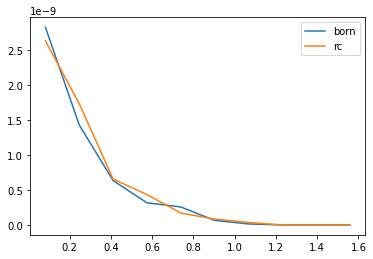

In [16]:


Factor_born_pT2 = 1000/(2.56819*(2.66-2.23)*(0.32-0.28)*(0.2809-0.1681)*(-2.44+3.141592)*(0.4-0.36))
Factor_rc_pT2 = Factor_born_pT2
df_born_pT2_traditional=pd.read_csv('clas6/out_clas6_born_pT2.txt',delim_whitespace=True,skiprows=[0])
df_born_pT2_traditional.head()
df_rc_pT2_traditional=pd.read_csv('clas6/out_clas6_rc_pT2.txt',delim_whitespace=True,skiprows=[0])
df_rc_pT2_traditional.head()

pT2s_born_traditional = df_born_pT2_traditional['pT2']
xss_pT2_born_traditional = df_born_pT2_traditional['yield']
pT2s_rc_traditional = df_rc_pT2_traditional['pT2']
xss_pT2_rc_traditional = df_rc_pT2_traditional['yield']

plt.plot(pT2s_born_traditional,xss_pT2_born_traditional,label = 'born')
plt.plot(pT2s_rc_traditional,xss_pT2_rc_traditional,label = 'rc')
plt.legend()

In [17]:
#For Q2=2.4,x=0.3,z =0.37,pt2=0.22, this part is for Q2 from 1.6 to 3.2
#The accurate value is Q2=2.37, x = 0.3025,z = 0.3748
df_pT2=clas6_data[clas6_data['z']==0.3748][clas6_data['x']==0.3025][clas6_data['Q2']==2.37][clas6_data['phi']==10]
df_pT2


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/3435505329.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pT2=clas6_data[clas6_data['z']==0.3748][clas6_data['x']==0.3025][clas6_data['Q2']==2.37][clas6_data['phi']==10]


,Q2,x,z,pT2,phi,ds_dxdQ2dzdpT2dphi,stat_err,sys_err,rad_cor
43204,2.37,0.3025,0.3748,0.0049,10.0,0.017539,0.006962,0.002361,0.9819
43262,2.37,0.3025,0.3748,0.2165,10.0,0.008034,0.002235,0.000957,0.9483
43280,2.37,0.3025,0.3748,0.3402,10.0,0.003871,0.000383,0.000467,0.9413
43298,2.37,0.3025,0.3748,0.5074,10.0,0.001013,0.000112,0.000123,0.9339
43316,2.37,0.3025,0.3748,0.7427,10.0,0.000277,0.000043,0.000035,0.9236


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/3809138499.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(pT2s_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')


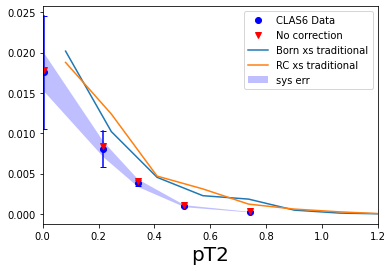

In [18]:

pT2s = df_pT2['pT2'].unique()
pT2s_axis=[]
xs_axis=[]
xs_before_axis=[]
xs_stat_err_axis=[]
xs_sys_err_axis=[]
fig = plt.figure()
ax = fig.add_subplot()
for i_pT2 in pT2s: 
    xs = np.mean(df_pT2[df_pT2['pT2']==i_pT2]['ds_dxdQ2dzdpT2dphi'])
    rc = np.mean(df_pT2[df_pT2['pT2']==i_pT2]['rad_cor'])
    xs_before = xs/rc
    #print(xs)
    xs_stat_err = np.mean(df_pT2[df_pT2['pT2']==i_pT2]['stat_err'])
    xs_sys_err = np.mean(df_pT2[df_pT2['pT2']==i_pT2]['sys_err'])
    pT2s_axis.append(i_pT2)
    xs_axis.append(xs)
    xs_before_axis.append(xs_before)
    xs_stat_err_axis.append(xs_stat_err)
    xs_sys_err_axis.append(xs_sys_err)
    ax.plot([i_pT2,i_pT2],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')

ax.fill_between(pT2s_axis,np.asarray(xs_axis)-np.asarray(xs_sys_err_axis),np.asarray(xs_axis)+np.asarray(xs_sys_err_axis),color='blue',alpha=0.25,linewidth=0,label='sys err')
plt.plot(pT2s_axis,xs_axis,'o',color='blue',label='CLAS6 Data')
plt.plot(pT2s_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')
plt.xlabel('pT2',fontsize=20)


plt.plot(pT2s_born_traditional,np.asarray(xss_pT2_born_traditional)*Factor_born_pT2,'-',label='Born xs traditional')
plt.plot(pT2s_rc_traditional,np.asarray(xss_pT2_rc_traditional)*Factor_rc_pT2,'-',label='RC xs traditional')
#plt.plot(pT2s_factorized,xs_rc_factorized,'-',label='Factorized')
plt.xlim(0,1.2)
#plt.ylim(0,0.02)
plt.legend()

plt.savefig('clas6/compare_pT2.pdf')

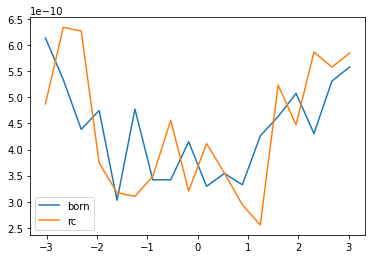

In [19]:

Factor_born_phi = 1000/(2.56819*(2.66-2.23)*(0.32-0.28)*(0.2809-0.1681)*(-2.44+3.141592)*(0.4-0.36))
Factor_rc_phi = Factor_born_phi
df_born_phi_traditional=pd.read_csv('clas6/out_clas6_born_phi.txt',delim_whitespace=True,skiprows=[0])
df_born_phi_traditional.head()
df_rc_phi_traditional=pd.read_csv('clas6/out_clas6_rc_phi.txt',delim_whitespace=True,skiprows=[0])
df_rc_phi_traditional.head()

phis_born_traditional = df_born_phi_traditional['phi']
xss_phi_born_traditional = df_born_phi_traditional['yield']
phis_rc_traditional = df_rc_phi_traditional['phi']
xss_phi_rc_traditional = df_rc_phi_traditional['yield']

plt.plot(phis_born_traditional,xss_phi_born_traditional,label = 'born')
plt.plot(phis_rc_traditional,xss_phi_rc_traditional,label = 'rc')
plt.legend()

In [20]:
#For Q2=2.4,x=0.3,z =0.37,pt2=0.22, this part is for Q2 from 1.6 to 3.2
#The accurate value is Q2=2.37, x = 0.3025,z = 0.3748
df_phi=clas6_data[clas6_data['z']==0.3748][clas6_data['x']==0.3025][clas6_data['Q2']==2.37][clas6_data['pT2']==0.2165]
df_phi


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/3454688585.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_phi=clas6_data[clas6_data['z']==0.3748][clas6_data['x']==0.3025][clas6_data['Q2']==2.37][clas6_data['pT2']==0.2165]


,Q2,x,z,pT2,phi,ds_dxdQ2dzdpT2dphi,stat_err,sys_err,rad_cor
43262,2.37,0.3025,0.3748,0.2165,10.0,0.008034,0.002235,0.000957,0.9483
43263,2.37,0.3025,0.3748,0.2165,30.0,0.008323,0.000506,0.000991,0.9523
43264,2.37,0.3025,0.3748,0.2165,50.0,0.008241,0.000657,0.000981,0.9602
43265,2.37,0.3025,0.3748,0.2165,70.0,0.008909,0.000401,0.001060,0.9723
43266,2.37,0.3025,0.3748,0.2165,90.0,0.008734,0.000260,0.001039,0.9884
43267,2.37,0.3025,0.3748,0.2165,110.0,0.008689,0.000295,0.001034,1.0096
43268,2.37,0.3025,0.3748,0.2165,130.0,0.008214,0.000397,0.000977,1.0350
43269,2.37,0.3025,0.3748,0.2165,150.0,0.008501,0.000322,0.001012,1.0538
43270,2.37,0.3025,0.3748,0.2165,170.0,0.008402,0.000237,0.001000,1.0588
43271,2.37,0.3025,0.3748,0.2165,190.0,0.008054,0.000230,0.000958,1.0588


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/4005328410.py:28: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(phis_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')


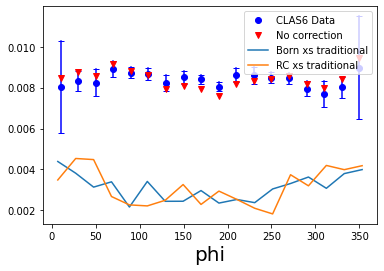

In [21]:

phis = df_phi['phi'].unique()
#print(phis)
phis_axis=[]
xs_axis=[]
xs_before_axis=[]
xs_stat_err_axis=[]
xs_sys_err_axis=[]
fig = plt.figure()
ax = fig.add_subplot()
for i_phi in phis:
    xs = df_phi[df_phi['phi']==i_phi]['ds_dxdQ2dzdpT2dphi']
    rc = df_phi[df_phi['phi']==i_phi]['rad_cor']
    xs_before = xs/rc
    #print(xs_before)
    #print(xs)
    xs_stat_err = df_phi[df_phi['phi']==i_phi]['stat_err']
    xs_sys_err = df_phi[df_phi['phi']==i_phi]['sys_err']
    phis_axis.append(i_phi)
    xs_axis.append(xs)
    xs_before_axis.append(xs_before)
    xs_stat_err_axis.append(xs_stat_err)
    xs_sys_err_axis.append(xs_sys_err)
    ax.plot([i_phi,i_phi],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')

    
#ax.fill_between(phis_axis,np.asarray(xs_axis)-np.asarray(xs_sys_err_axis),np.asarray(xs_axis)+np.asarray(xs_sys_err_axis),color='blue',alpha=0.25,linewidth=0,label='sys err')
plt.plot(phis_axis,xs_axis,'o',color='blue',label='CLAS6 Data')
plt.plot(phis_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')
plt.xlabel('phi',fontsize=20)


plt.plot((np.asarray(phis_born_traditional)+3.14)*180/3.14,np.asarray(xss_phi_born_traditional)*Factor_born_phi,'-',label='Born xs traditional')
plt.plot((np.asarray(phis_rc_traditional)+3.14)*180/3.14,np.asarray(xss_phi_rc_traditional)*Factor_rc_phi,'-',label='RC xs traditional')
#plt.plot(phis_factorized,xs_rc_factorized,'-',label='Factorized')
#plt.xlim(-3.2,3.2)
#plt.ylim(0,0.02)
plt.legend()

plt.savefig('clas6/compare_phi.pdf')

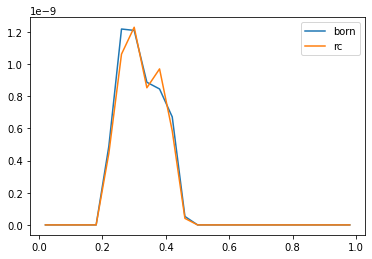

In [22]:


Factor_born_x = 1000/(2.56819*(2.66-2.23)*(0.32-0.28)*(0.2809-0.1681)*(-2.44+3.141592)*(0.4-0.36))
Factor_rc_x = Factor_born_x
df_born_xb_traditional=pd.read_csv('clas6/out_clas6_born_x.txt',delim_whitespace=True,skiprows=[0])
df_born_xb_traditional.head()
df_rc_xb_traditional=pd.read_csv('clas6/out_clas6_rc_x.txt',delim_whitespace=True,skiprows=[0])
df_rc_xb_traditional.head()

xbs_born_traditional = df_born_xb_traditional['x']
xss_xb_born_traditional = df_born_xb_traditional['yield']
xbs_rc_traditional = df_rc_xb_traditional['x']
xss_xb_rc_traditional = df_rc_xb_traditional['yield']

plt.plot(xbs_born_traditional,xss_xb_born_traditional,label = 'born')
plt.plot(xbs_rc_traditional,xss_xb_rc_traditional,label = 'rc')
plt.legend()

In [23]:
#For x=2.4,x=0.3,z =0.37,pt2=0.22, this part is for x from 1.6 to 3.2
#The accurate value is Q2=2.37, x = 0.3025,z = 0.3748
df_x=clas6_data[clas6_data['z']==0.3748][clas6_data['Q2']==2.37][clas6_data['pT2']==0.2165][clas6_data['phi']==10]
df_x


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/1456758235.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_x=clas6_data[clas6_data['z']==0.3748][clas6_data['Q2']==2.37][clas6_data['pT2']==0.2165][clas6_data['phi']==10]


,Q2,x,z,pT2,phi,ds_dxdQ2dzdpT2dphi,stat_err,sys_err,rad_cor
38953,2.37,0.2362,0.3748,0.2165,10.0,0.019239,0.004296,0.002259,0.9924
40986,2.37,0.2686,0.3748,0.2165,10.0,0.012720,0.001980,0.001604,0.9676
43262,2.37,0.3025,0.3748,0.2165,10.0,0.008034,0.002235,0.000957,0.9483
45437,2.37,0.3379,0.3748,0.2165,10.0,0.011794,0.004693,0.001391,0.9322
47564,2.37,0.3748,0.3748,0.2165,10.0,0.003427,0.002531,0.000419,0.9189
49412,2.37,0.4134,0.3748,0.2165,10.0,0.002137,0.001562,0.000266,0.9044
51130,2.37,0.4537,0.3748,0.2165,10.0,0.003983,0.003042,0.000529,0.8842
52594,2.37,0.4958,0.3748,0.2165,10.0,0.004900,0.001346,0.000647,0.8657
53790,2.37,0.5397,0.3748,0.2165,10.0,0.002820,0.001192,0.000376,0.8525


[0.2362 0.2686 0.3025 0.3379 0.3748 0.4134 0.4537 0.4958 0.5397]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_83432/3204373335.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(xbs_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')


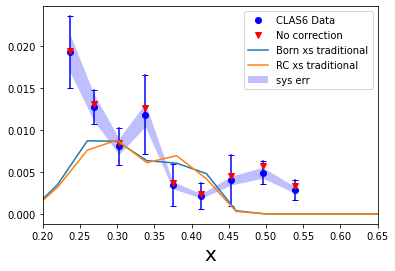

In [24]:

xbs = df_x['x'].unique()
print(xbs)
xbs_axis=[]
xs_axis=[]
xs_before_axis=[]
xs_stat_err_axis=[]
xs_sys_err_axis=[]
fig = plt.figure()
ax = fig.add_subplot()
for i_xb in xbs:
    xs = np.mean(df_x[df_x['x']==i_xb]['ds_dxdQ2dzdpT2dphi'])
    rc = np.mean(df_x[df_x['x']==i_xb]['rad_cor'])
    xs_before=(xs/rc)
    xs_stat_err = np.mean(df_x[df_x['x']==i_xb]['stat_err'])
    xs_sys_err = np.mean(df_x[df_x['x']==i_xb]['sys_err'])
    xbs_axis.append(i_xb)
    xs_axis.append(xs)
    xs_before_axis.append(xs_before)
    xs_stat_err_axis.append(xs_stat_err)
    xs_sys_err_axis.append(xs_sys_err)
    ax.plot([i_xb,i_xb],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')

ax.fill_between(xbs_axis,np.asarray(xs_axis)-np.asarray(xs_sys_err_axis),np.asarray(xs_axis)+np.asarray(xs_sys_err_axis),color='blue',alpha=0.25,linewidth=0,label='sys err')
plt.plot(xbs_axis,xs_axis,'o',color='blue',label='CLAS6 Data')
plt.plot(xbs_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')
plt.xlabel('x',fontsize=20)


plt.plot(xbs_born_traditional,np.asarray(xss_xb_born_traditional)*Factor_born_x,'-',label='Born xs traditional')
plt.plot(xbs_rc_traditional,np.asarray(xss_xb_rc_traditional)*Factor_rc_x,'-',label='RC xs traditional')
#plt.plot(xbs_factorized,xs_rc_factorized,'-',label='Factorized')
plt.xlim(0.2,0.65)
#plt.ylim(0,0.02)
plt.legend()

plt.savefig('clas6/compare_xb.pdf')